# Support Vector Regression (SVR)

Tube + line -> Epsilon insensitive tube (points inside the tube - error disregarded) -> margin of error
error measured bw point and tube

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
df = pd.read_csv('/content/Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


StandardScaler expects 2D array as input

In [5]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

implicit reln bw X and y , no coeff, y take super high values than X

In [6]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X = sc1.fit_transform(X)
sc2 = StandardScaler()
y = sc2.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [9]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf")
svr.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [13]:
sc2.inverse_transform(svr.predict(sc1.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

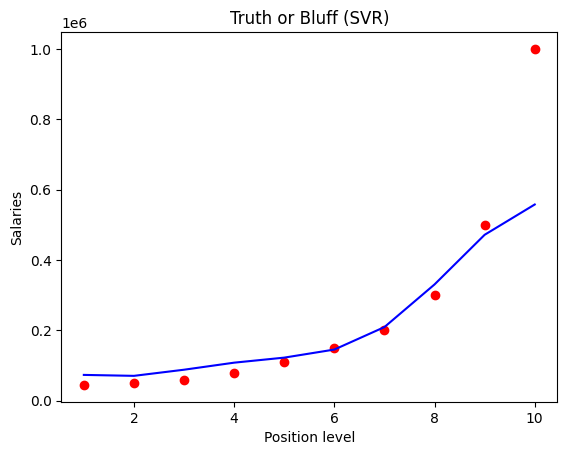

In [15]:
plt.scatter(sc1.inverse_transform(X), sc2.inverse_transform(y), color='red')
plt.plot(sc1.inverse_transform(X), sc2.inverse_transform(svr.predict(X).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-16-43d26e4181df>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc1.inverse_transform(X)), max(sc1.inverse_transform(X)), 0.1)


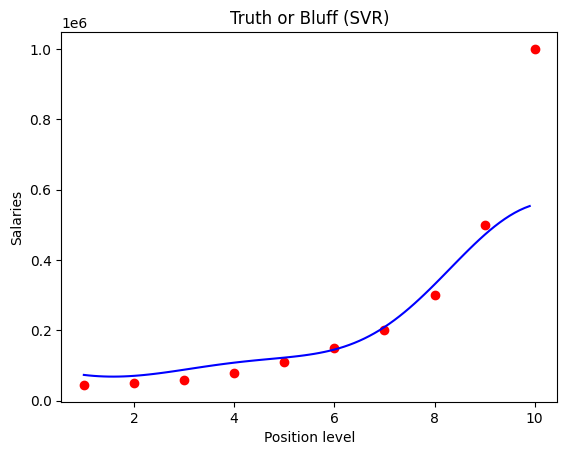

In [16]:
X_grid = np.arange(min(sc1.inverse_transform(X)), max(sc1.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc1.inverse_transform(X), sc2.inverse_transform(y), color='red')
plt.plot(X_grid, sc2.inverse_transform(svr.predict(sc1.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()